In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
#from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss
SEED = 42

In [ ]:
#HR ANALYTICS

In [2]:
pwd

'C:\\Users\\shiml'

In [3]:
gen=pd.read_csv(r"OneDrive/Desktop/general_data.csv")

In [4]:
gen.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
emp=pd.read_csv(r"OneDrive/Desktop/employee_survey_data.csv")

In [6]:
emp.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [7]:
man=pd.read_csv(r"OneDrive/Desktop/manager_survey_data.csv")

In [8]:
man.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [9]:
gen=emp.merge(gen,on='EmployeeID',how='inner')

In [10]:

gen.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [11]:
gen=man.merge(gen,on='EmployeeID',how='inner')

In [12]:
#in and out-time we will merge
in_df=pd.read_csv(r"OneDrive/Desktop/in_time.csv")

In [13]:
in_df.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [14]:
out_df=pd.read_csv(r"OneDrive/Desktop/out_time.csv")
out_df_copy=out_df.copy(deep=True)

In [15]:
out_df.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [16]:
out_df_copy.fillna(0)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0.0,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,0.0,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,0.0,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,0.0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,0.0,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,0.0,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,0.0,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,0.0,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,0.0,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,0.0,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,0.0,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,0.0,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,0.0,2015-01-02 16:19:01,0,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,0.0,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,0.0,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,0.0,2015-12-28 17:43:28,0,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,0.0,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,0,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,0.0,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [17]:
#creating new feature for overtime from intime and outtime dataset.
arr = []
for i in range(0,4410):
    flag=0
    for j in range(1,262):
        a=(pd.Timestamp(out_df.iloc[i][j])-pd.Timestamp(in_df.iloc[i][j]))//pd.Timedelta("1s")
        if a>28800:
            flag=1
            break
    if flag==1:
        arr.append('Yes')
    else:
        arr.append('No')
        
print(arr)

['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No'

In [18]:
out_df_copy.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [19]:
pd.set_option('max_columns', None)
gen.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [20]:
gen.shape

(4410, 29)

In [21]:
gen.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741,2.723603,2.728246,2.761436,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,1273.201673,0.711400,0.360742,1.092756,1.101253,0.706245,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1103.250000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3307.750000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,4410.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [22]:
pd.isnull(gen).sum()
#we infer that nan values are present less in number as compared to number of rows so we going to remove the  nan rows

EmployeeID                  0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [23]:
gen.dtypes
#We see that it do not contain special character other than nan because every feature is having expected datatype 

EmployeeID                   int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager

In [24]:
#cloning
gendeep=gen.copy(deep=True)
geendeep_2=gen.copy(deep=True)
geendeep_4=geendeep_2.copy(deep=True)#for extra

In [25]:
#new feature created overtime
geendeep_2['OverTime']=arr

In [26]:
geendeep_2.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,OverTime
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,No
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,Yes
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,No
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,No
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,Yes


In [27]:
geendeep_4.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [28]:
geendeep_2['OverTime']=arr

In [29]:
#Missing values
geendeep_2.dropna(axis=0,inplace=True,)

In [30]:
#pd.isnull(gendeep).sum()
pd.isnull(geendeep_2).sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
OverTime                   0
dtype: int64

In [31]:
geendeep_2.columns

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'OverTime'],
      dtype='object')

In [32]:
pd.unique(geendeep_2['Age'])

array([51, 31, 32, 38, 46, 28, 29, 25, 45, 55, 47, 37, 21, 35, 26, 50, 53,
       44, 49, 36, 42, 18, 41, 39, 58, 33, 43, 52, 27, 30, 54, 40, 23, 48,
       57, 34, 24, 22, 56, 60, 19, 20, 59], dtype=int64)

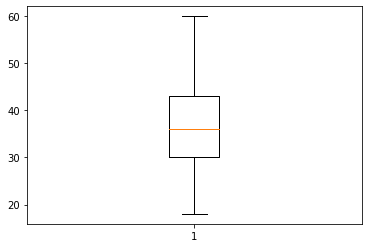

In [33]:
plt.boxplot(geendeep_2['Age'])
plt.show()

In [34]:
for x in ['MonthlyIncome']:
    q75,q25 = np.percentile(geendeep_2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    geendeep_2.loc[geendeep_2[x] < min,x] = np.nan
    geendeep_2.loc[geendeep_2[x] > max,x] = np.nan


In [35]:
pd.isnull(geendeep_2).sum()

EmployeeID                   0
JobInvolvement               0
PerformanceRating            0
EnvironmentSatisfaction      0
JobSatisfaction              0
WorkLifeBalance              0
Age                          0
Attrition                    0
BusinessTravel               0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
Gender                       0
JobLevel                     0
JobRole                      0
MaritalStatus                0
MonthlyIncome              331
NumCompaniesWorked           0
Over18                       0
PercentSalaryHike            0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
YearsAtCompany               0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
OverTime                     0
dtype: int64

In [36]:
geendeep_2.dropna(axis=0,inplace=True,)

In [37]:
pd.isnull(geendeep_2).sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
OverTime                   0
dtype: int64

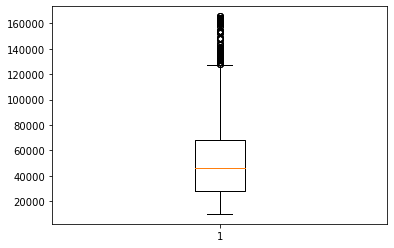

In [38]:
plt.boxplot(geendeep_2['MonthlyIncome'])
plt.show()

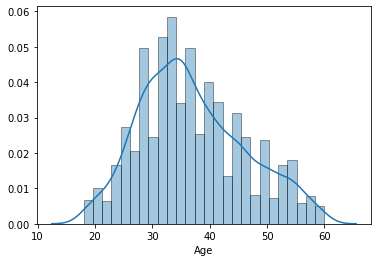

In [39]:
#exploratory data analysis
#univariate analysis
#continuous variable
sns.distplot(geendeep_2["Age"],hist_kws=dict(edgecolor="black"))

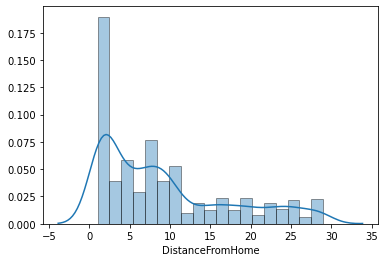

In [40]:
sns.distplot(geendeep_2["DistanceFromHome"],hist_kws=dict(edgecolor="black"))

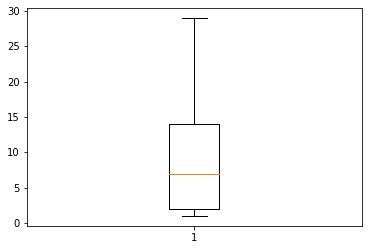

In [41]:
plt.boxplot(geendeep_2['DistanceFromHome'])
plt.show()

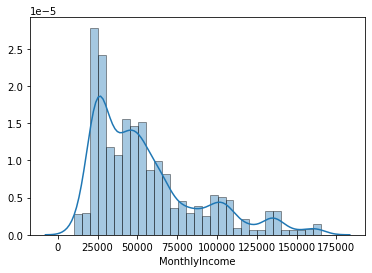

In [42]:
sns.distplot(geendeep_2["MonthlyIncome"],hist_kws=dict(edgecolor="black"))

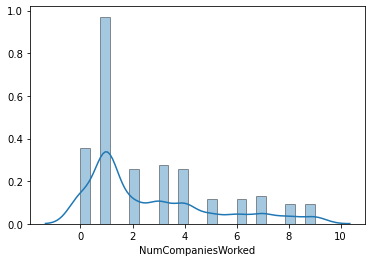

In [43]:
sns.distplot(geendeep_2["NumCompaniesWorked"],hist_kws=dict(edgecolor="black"))

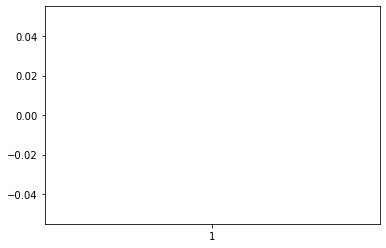

In [44]:
plt.boxplot(gendeep["NumCompaniesWorked"])
plt.show()

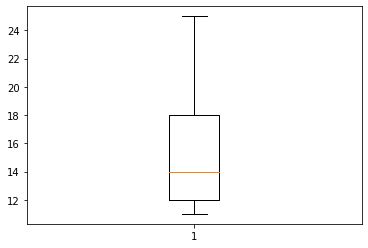

In [45]:
plt.boxplot(geendeep_2["PercentSalaryHike"])
plt.show()

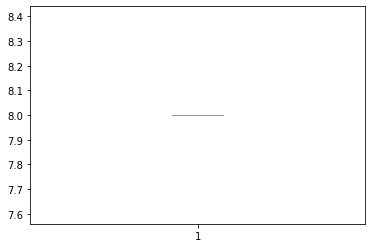

In [46]:
plt.boxplot(geendeep_2['StandardHours'])
plt.show()

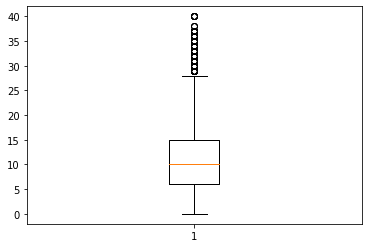

In [47]:
plt.boxplot(geendeep_2['TotalWorkingYears'])
plt.show()

In [48]:
for x in ['TotalWorkingYears']:
    q75,q25 = np.percentile(geendeep_2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    geendeep_2.loc[geendeep_2[x] < min,x] = np.nan
    geendeep_2.loc[geendeep_2[x] > max,x] = np.nan
    


In [49]:
geendeep_2.dropna(axis=0,inplace=True)

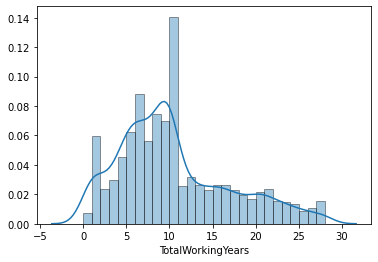

In [50]:
sns.distplot(geendeep_2['TotalWorkingYears'],hist_kws=dict(edgecolor="black"))

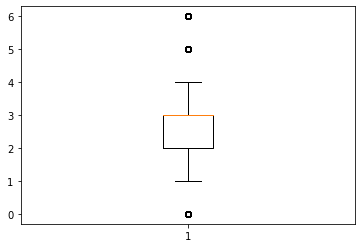

In [51]:
plt.boxplot(geendeep_2['TrainingTimesLastYear'])
plt.show()

In [52]:
for x in ['TrainingTimesLastYear']:
    q75,q25 = np.percentile(geendeep_2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    geendeep_2.loc[geendeep_2[x] < min,x] = np.nan
    geendeep_2.loc[geendeep_2[x] > max,x] = np.nan


In [53]:
pd.isnull(geendeep_2).sum()

EmployeeID                   0
JobInvolvement               0
PerformanceRating            0
EnvironmentSatisfaction      0
JobSatisfaction              0
WorkLifeBalance              0
Age                          0
Attrition                    0
BusinessTravel               0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
Gender                       0
JobLevel                     0
JobRole                      0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
Over18                       0
PercentSalaryHike            0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear      579
YearsAtCompany               0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
OverTime                     0
dtype: int64

In [54]:
geendeep_2.dropna(axis=0,inplace=True)

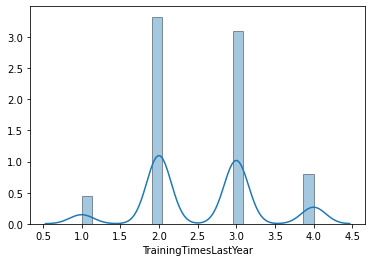

In [55]:
sns.distplot(geendeep_2['TrainingTimesLastYear'],hist_kws=dict(edgecolor="black"))

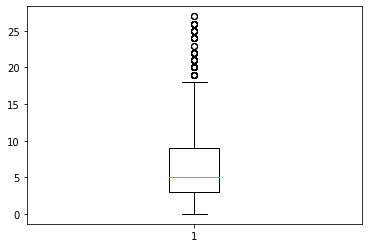

In [56]:
plt.boxplot(geendeep_2['YearsAtCompany'])
plt.show()

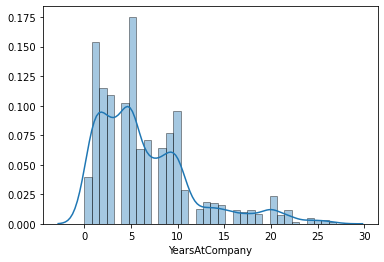

In [57]:
sns.distplot(geendeep_2['YearsAtCompany'],hist_kws=dict(edgecolor="black"))

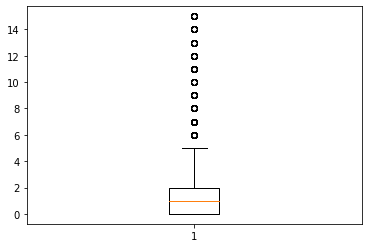

In [58]:
plt.boxplot(geendeep_2['YearsSinceLastPromotion'])
plt.show()

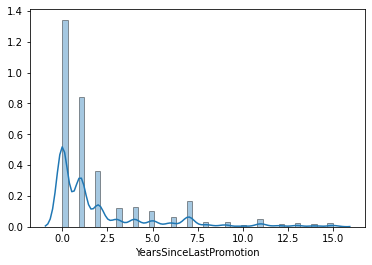

In [59]:
sns.distplot(geendeep_2['YearsSinceLastPromotion'],hist_kws=dict(edgecolor="black"))

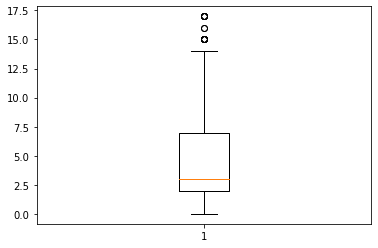

In [60]:
plt.boxplot(geendeep_2['YearsWithCurrManager'])
plt.show()

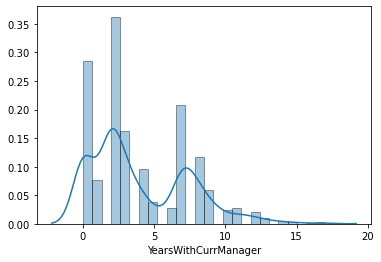

In [61]:
sns.distplot(geendeep_2['YearsWithCurrManager'],hist_kws=dict(edgecolor="black"))

In [62]:
geendeep_3=geendeep_2.copy(deep=True)

In [63]:
#Univariate Analysis
#Now Let's look at the distribution of our target variable, i.e. Attrition. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [64]:
gendeep['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [65]:
#Normalize can set be true instead of numbers to print proportions
gendeep['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

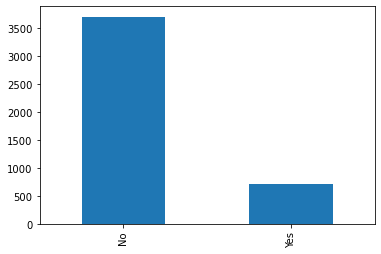

In [66]:
# plotting the bar plot of frequencies
gendeep['Attrition'].value_counts().plot.bar()

In [67]:
#we can infer that data is imbalanced.

In [68]:
"""So, 544 out of 3210 said yes for attrition which is approx 16 %.Let's now explore the variables to have a better understanding of the dataset.We will first explore the variables individually using univariate analysis,then we will look at the relation between various independent variables and the target variable.We will also look at the correlation plot to see which variables affects the target variable most.

Let's first look at the distribution of age variable to see how many people belongs to a particular age group."""

"So, 544 out of 3210 said yes for attrition which is approx 16 %.Let's now explore the variables to have a better understanding of the dataset.We will first explore the variables individually using univariate analysis,then we will look at the relation between various independent variables and the target variable.We will also look at the correlation plot to see which variables affects the target variable most.\n\nLet's first look at the distribution of age variable to see how many people belongs to a particular age group."

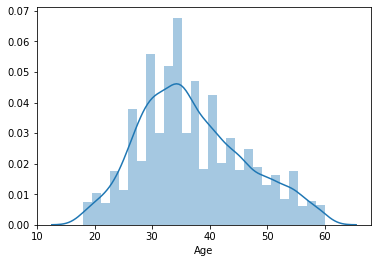

In [83]:
sns.distplot(gendeep['Age'])

In [84]:
#we can infer that most of the people working are in the age group 20-60.specially 30-40 age group.
#Now we will plot distance from home

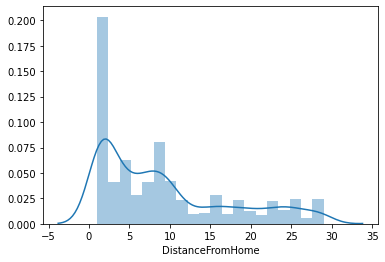

In [85]:
sns.distplot(gendeep['DistanceFromHome'])

In [86]:
#we can infer that most people have leaving near the office.
#next let us plot for environmental satisfaction.since it has levels so it is categorical variable and we will plot bar plot.

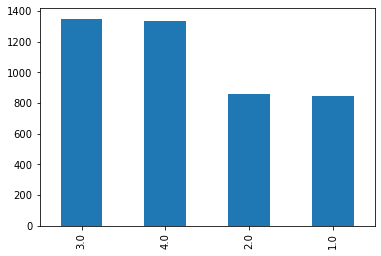

In [87]:
gendeep['EnvironmentSatisfaction'].value_counts().plot.bar()

In [88]:
#so on a scale of 1-4 in increasing order it will be highly satisfactory.
#from the plot we see that mostly have given 3 and 4 rating ,so it is good.
#next we will see job involvement,again it is categorical so we will plot bar plot.

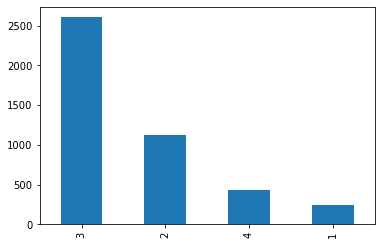

In [89]:
gendeep['JobInvolvement'].value_counts().plot.bar()

In [90]:
#we can infer that maximum has high job involvement(3).
#we will see now of job role column.

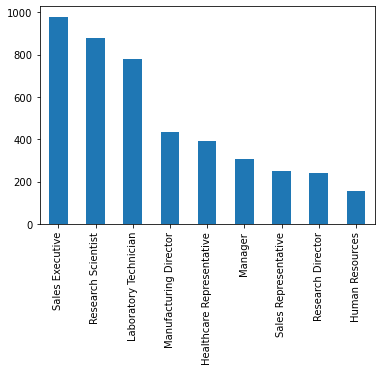

In [91]:
gendeep['JobRole'].value_counts().plot.bar()

In [92]:
#we infer that mostly(top-3) they are in sales executive,research scientist,laboratory technician.
#we will see now job satisfaction.

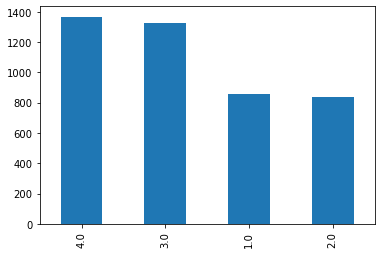

In [93]:
gendeep['JobSatisfaction'].value_counts().plot.bar()

In [94]:
#in job satisfaction also mostly have rated 4 and 3.
#maritalstatus

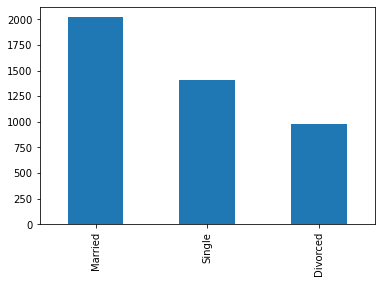

In [95]:
gendeep['MaritalStatus'].value_counts().plot.bar()

In [96]:
#Maximum are married,so i think more responsibilities.
#Monthly Income

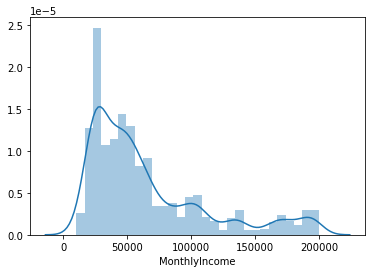

In [97]:
sns.distplot(gendeep['MonthlyIncome'])

In [98]:
#mostly are in the range of 25000-65000,max. at 25000.
#number of companies they have worked

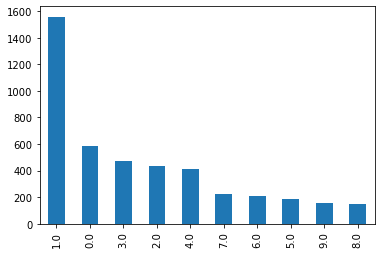

In [99]:
gendeep['NumCompaniesWorked'].value_counts().plot.bar()

In [100]:
#we can infer that mostly have worked in 1 company.
# next let us see number of people over 18.

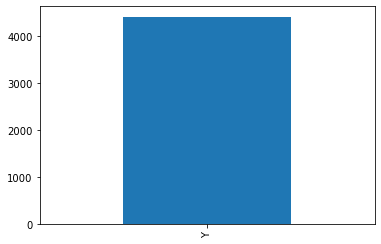

In [101]:
gendeep['Over18'].value_counts().plot.bar()

In [102]:
#everyone are above 18.
#percent salary hike

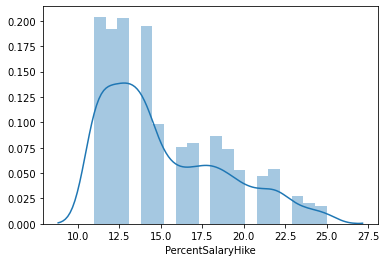

In [103]:
sns.distplot(gendeep['PercentSalaryHike'])

In [104]:
#maximum have 12.5% hike.
# next performance rating

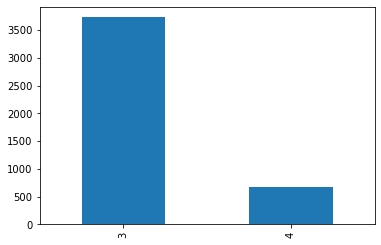

In [105]:
gendeep['PerformanceRating'].value_counts().plot.bar()

In [106]:
#so noone got 1 and 2 rating which ia a good sign and mostly have excellent performance rating.
#next lets see the standard hours

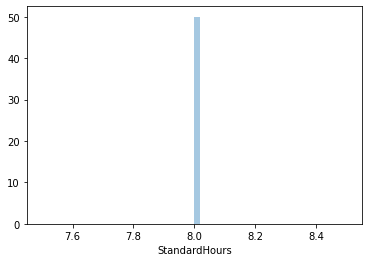

In [107]:
sns.distplot(gendeep['StandardHours'])

In [108]:
#so everyone works for 8 hrs.
#next total working yrs

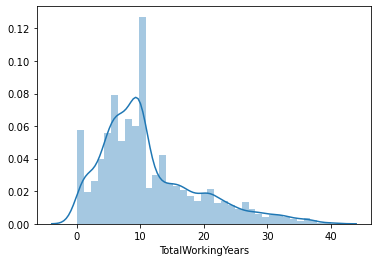

In [109]:
sns.distplot(gendeep['TotalWorkingYears'])

In [110]:
#mostly have 0 to 10 years of experience.
#next lets see work life balance

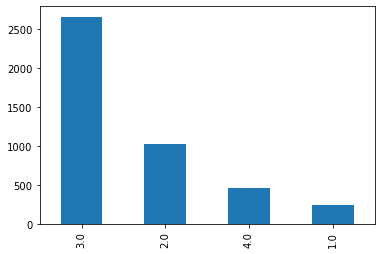

In [111]:
gendeep['WorkLifeBalance'].value_counts().plot.bar()

In [112]:
#so mostle have rated better.
#next lets see years at company

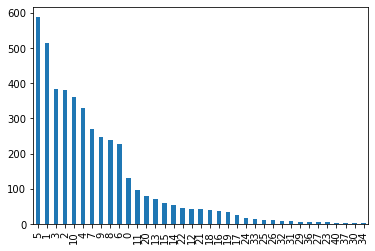

In [113]:
gendeep['YearsAtCompany'].value_counts().plot.bar()

In [114]:
#so max have been 5 yrs in company.
#next years since last promotion.

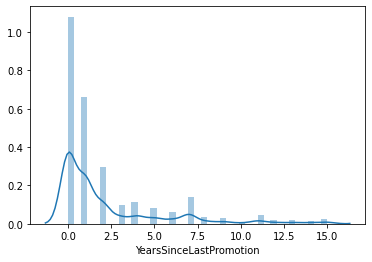

In [115]:
sns.distplot(gendeep['YearsSinceLastPromotion'])

In [116]:
#its a good record as maximum have 0 years.
#next years with current manager.

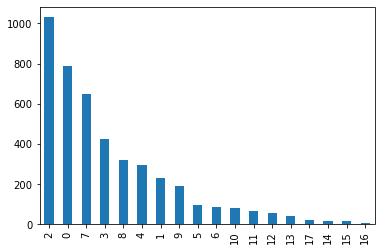

In [117]:
gendeep['YearsWithCurrManager'].value_counts().plot.bar()

In [118]:
#max. have 2 years or zero years,means frequent change in manager is there.


In [119]:
#Now we will explore these variables against the target variable using bivariate analysis.
#We will make use of scatter plots for continuous or numeric variables and crosstabs for the categorical variablesand also using groupby .
#lets start with overtime and attrition

Attrition    No  Yes
OverTime            
No         1206  137
Yes        1460  407


Text(0, 0.5, 'percentage')

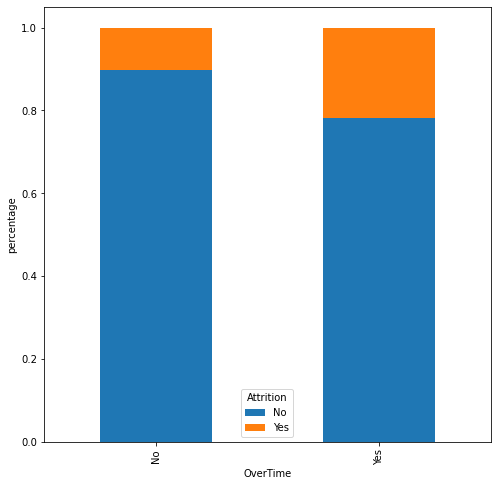

In [136]:
print(pd.crosstab(geendeep_2['OverTime'],geendeep_2['Attrition']))

job=pd.crosstab(geendeep_2['OverTime'],geendeep_2['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('OverTime')
plt.ylabel('percentage')

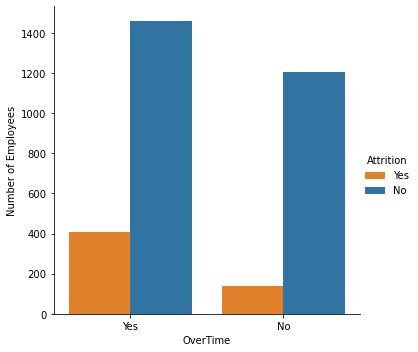

In [137]:
# to plot employee distribution by OverTime, with distinct Attrition classes
sns.axes_style('whitegrid')
sns.factorplot("OverTime", data=geendeep_2, aspect=1, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees')

In [ ]:
#overtime seems to be the key factor in attrition.

,mean_age
Attrition,
No,37.561233
Yes,33.607595


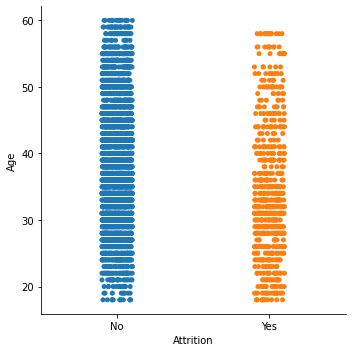

In [120]:
sns.catplot(x="Attrition", y="Age", data=gendeep)
gendeep.groupby(['Attrition']).agg(mean_age=('Age',np.mean))

In [121]:
# so the mean age of people leaving is 33 and mostly leaving are the younger people 20-40 specially age of 33.
#next plot distance from home.

,mean_Home
Attrition,
No,9.227088
Yes,9.012658


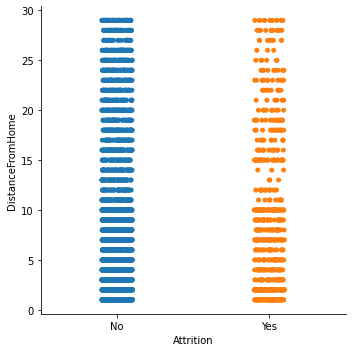

In [122]:
sns.catplot(x="Attrition", y="DistanceFromHome", data=gendeep)
gendeep.groupby(['Attrition']).agg(mean_Home=('DistanceFromHome',np.mean))

In [123]:
#Education level and attrition

Attrition    No  Yes
Education           
1           432   78
2           687  159
3          1449  267
4          1008  186
5           123   21


Text(0, 0.5, 'percentage')

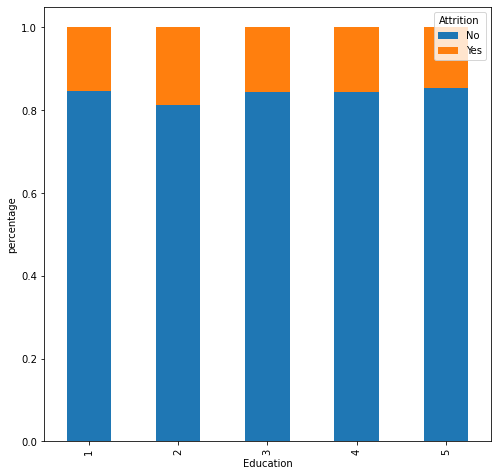

In [124]:
print(pd.crosstab(gendeep['Education'],gendeep['Attrition']))

job=pd.crosstab(gendeep['Education'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Education')
plt.ylabel('percentage')

In [125]:
# We can make inference that 2 level i.e of education till college have  22.2 % approx from the plot.It is the highest who left in any education feild.
#next plotting environmental satisfaction

Attrition                  No  Yes
EnvironmentSatisfaction           
1.0                       632  213
2.0                       728  128
3.0                      1164  186
4.0                      1155  179


Text(0, 0.5, 'percentage')

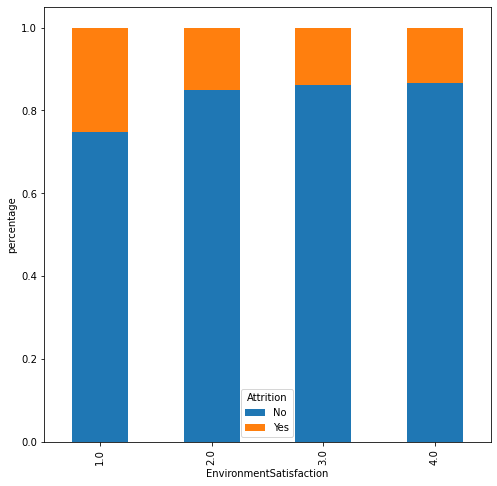

In [126]:
print(pd.crosstab(gendeep['EnvironmentSatisfaction'],gendeep['Attrition']))

job=pd.crosstab(gendeep['EnvironmentSatisfaction'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('EnvironmentSatisfaction')
plt.ylabel('percentage')

In [127]:
#we get inference that people whose environmental satisfaction is low i.e level 1 tends to leave his/her job more frequent.
#next plot for gender.

Attrition    No  Yes
Gender              
Female     1494  270
Male       2205  441


Text(0, 0.5, 'percentage')

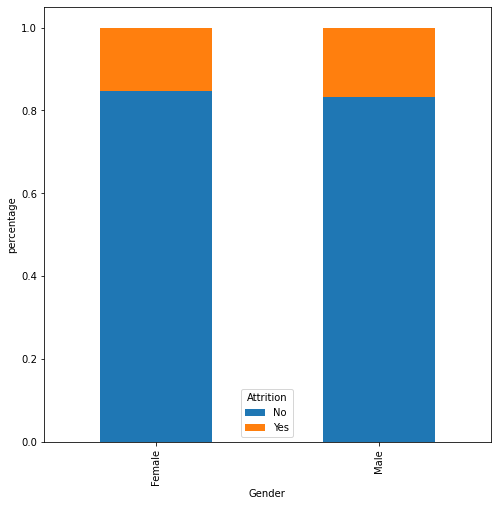

In [128]:
print(pd.crosstab(gendeep['Gender'],gendeep['Attrition']))

job=pd.crosstab(gendeep['Gender'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Gender')
plt.ylabel('percentage')

In [129]:
#so not much difference in gender.
#lets see job involvement.

Attrition         No  Yes
JobInvolvement           
1                195   54
2                945  180
3               2205  399
4                354   78


Text(0, 0.5, 'percentage')

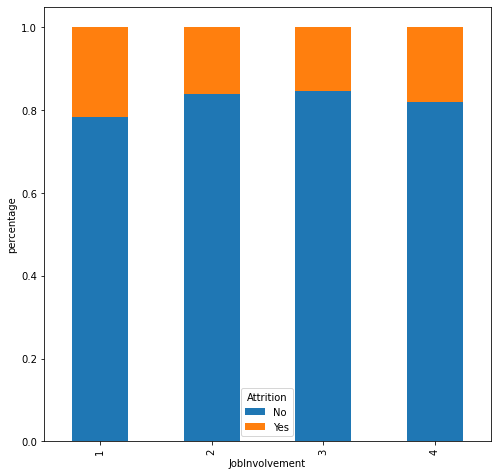

In [130]:
print(pd.crosstab(gendeep['JobInvolvement'],gendeep['Attrition']))

job=pd.crosstab(gendeep['JobInvolvement'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('JobInvolvement')
plt.ylabel('percentage')

In [131]:
#we can infer that people with either low or vigh high job envolvement is there,people said yes to attrition.
#next lets see job role

Attrition                   No  Yes
JobRole                            
Healthcare Representative  336   57
Human Resources            135   21
Laboratory Technician      651  126
Manager                    264   42
Manufacturing Director     387   48
Research Director          183   57
Research Scientist         717  159
Sales Executive            813  165
Sales Representative       213   36


Text(0, 0.5, 'percentage')

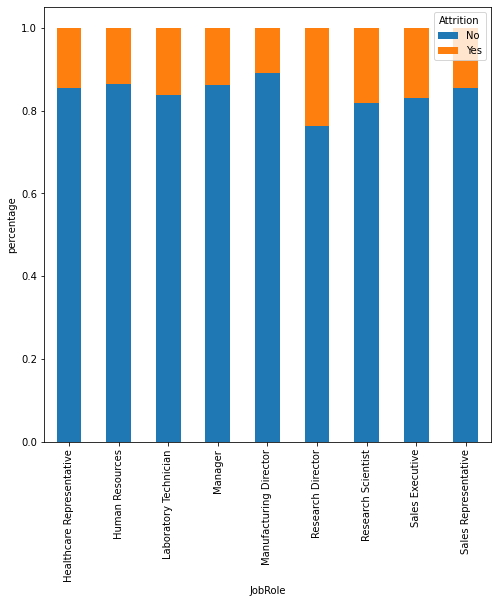

In [132]:
print(pd.crosstab(gendeep['JobRole'],gendeep['Attrition']))

job=pd.crosstab(gendeep['JobRole'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('JobRole')
plt.ylabel('percentage')

In [133]:
#from job role mostly research director,research scientist,sales executive have left the job.
# next lets see Job satisfaction

Attrition          No  Yes
JobSatisfaction           
1.0               663  197
2.0               702  138
3.0              1104  219
4.0              1211  156


Text(0, 0.5, 'percentage')

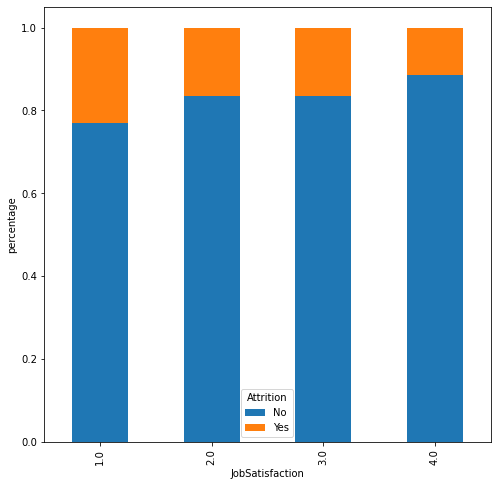

In [134]:
print(pd.crosstab(gendeep['JobSatisfaction'],gendeep['Attrition']))

job=pd.crosstab(gendeep['JobSatisfaction'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('JobSatisfaction')
plt.ylabel('percentage')

In [135]:
#we infer that those having low jobsatisfaction tends to leave their job.
#next lets see marital status

Attrition        No  Yes
MaritalStatus           
Divorced        636   63
Married        1267  191
Single          763  290


Text(0, 0.5, 'percentage')

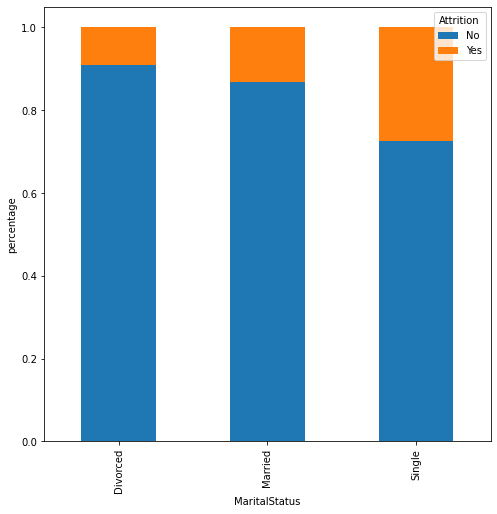

In [126]:
print(pd.crosstab(gendeep['MaritalStatus'],gendeep['Attrition']))

job=pd.crosstab(gendeep['MaritalStatus'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('MaritalStatus')
plt.ylabel('percentage')

In [127]:
#we can infer that singles tends to leave the job more often i.e 27.5% approx.
#lets see monthly income

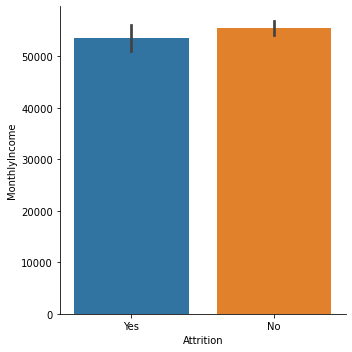

In [128]:
#sns.catplot(x="Attrition", y="MonthlyIncome", data=gendeep)
#gendeep.groupby(['Attrition']).agg(mean_Home=('MonthlyIncome',np.mean))
sns.catplot(x="Attrition", y="MonthlyIncome", kind="bar", data=gendeep)

In [129]:
#from mean we infer that monthly income those who left job is slightly less and distribution is same as those who are in job mostly.
#next lets see number companies worked

Attrition            No  Yes
NumCompaniesWorked          
0.0                 390   55
1.0                 950  235
2.0                 270   35
3.0                 268   33
4.0                 285   37
5.0                 110   42
6.0                 110   35
7.0                 110   30
8.0                 100   18
9.0                  73   24


Text(0, 0.5, 'percentage')

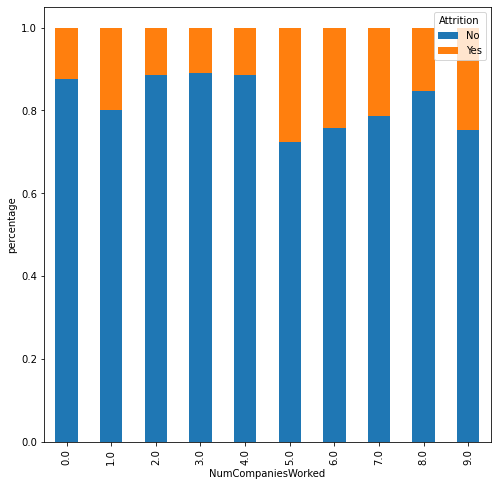

In [130]:
print(pd.crosstab(gendeep['NumCompaniesWorked'],gendeep['Attrition']))

job=pd.crosstab(gendeep['NumCompaniesWorked'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('NumCompaniesWorked')
plt.ylabel('percentage')

In [131]:
#we can infer that people tends to leave job who have more or equal to 5 number of companies worked.
#next let see performance rating.

Attrition            No  Yes
PerformanceRating           
3                  2280  446
4                   386   98


Text(0, 0.5, 'percentage')

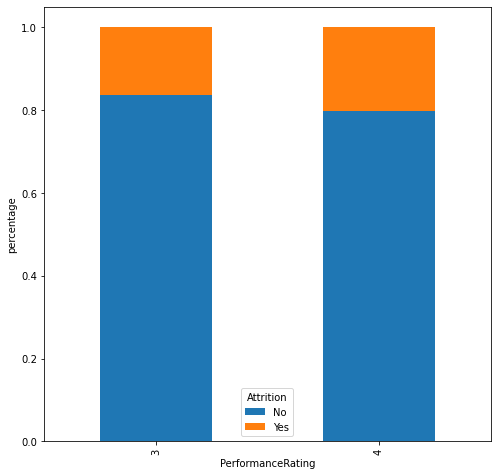

In [132]:
print(pd.crosstab(gendeep['PerformanceRating'],gendeep['Attrition']))

job=pd.crosstab(gendeep['PerformanceRating'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('PerformanceRating')
plt.ylabel('percentage')

In [133]:
#we can infer that performance rating for outstanding level tends to leave the job,maybe they are more productive and therefore want
#more requirements from company.
#lets see of total working years.

Attrition           No  Yes
TotalWorkingYears          
0.0                 14   11
1.0                 89  106
2.0                 51   24
3.0                 63   24
4.0                122   30
5.0                161   29
6.0                236   49
7.0                140   39
8.0                196   37
9.0                213   22
10.0               391   53
11.0                58   15
12.0                87    9
13.0                68    9
14.0                63   12
15.0                71   12
16.0                81    9
17.0                75    9
18.0                62    9
19.0                44    9
20.0                75    3
21.0                65    3
22.0                47    6
23.0                51    3
24.0                33    6
25.0                27    0
26.0                37    3
27.0                17    0
28.0                29    3


Text(0, 0.5, 'percentage')

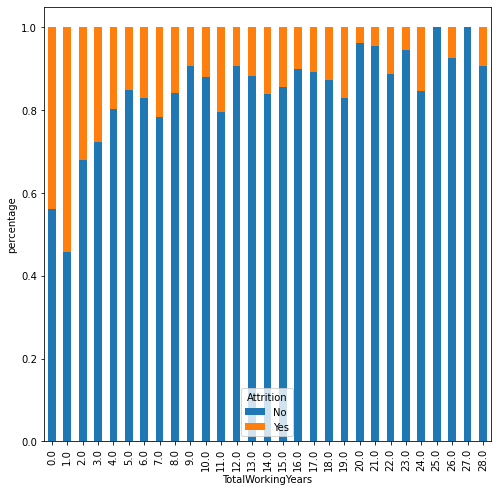

In [134]:
print(pd.crosstab(gendeep['TotalWorkingYears'],gendeep['Attrition']))

job=pd.crosstab(gendeep['TotalWorkingYears'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('TotalWorkingYears')
plt.ylabel('percentage')

In [135]:
#we can infer that total working years of 1 year tends to switch job mostly.
#lets plot traning times last year.

Attrition                No  Yes
TrainingTimesLastYear           
1.0                     162   23
2.0                    1159  234
3.0                    1051  243
4.0                     294   44


Text(0, 0.5, 'percentage')

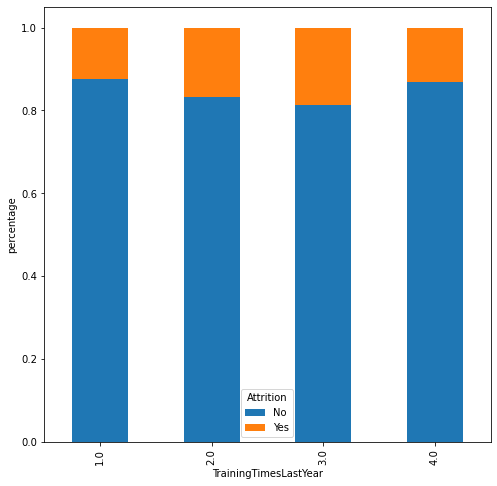

In [136]:
print(pd.crosstab(gendeep['TrainingTimesLastYear'],gendeep['Attrition']))

job=pd.crosstab(gendeep['TrainingTimesLastYear'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('percentage')

In [137]:
#Its almost equal for all cases so its no dependent on attrition.
#next lets see work life balance.

Attrition          No  Yes
WorkLifeBalance           
1.0               106   46
2.0               607  142
3.0              1674  285
4.0               279   71


Text(0, 0.5, 'percentage')

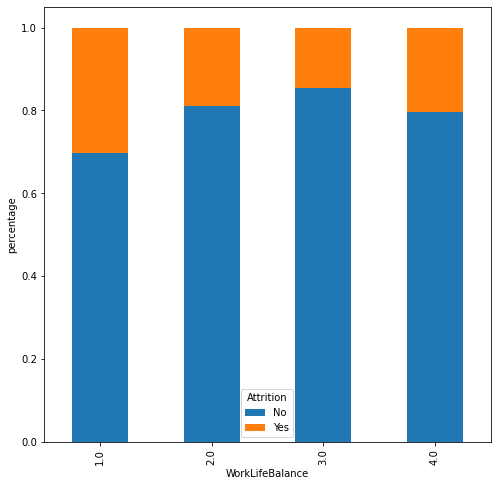

In [138]:
print(pd.crosstab(gendeep['WorkLifeBalance'],gendeep['Attrition']))

job=pd.crosstab(gendeep['WorkLifeBalance'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('WorkLifeBalance')
plt.ylabel('percentage')

In [139]:
#we can infer that work life balance for level 1 i.e bad tends to leave the job,which is obvious because they cannot manage it.
#next lets see percent salary hike

,mean_Home
Attrition,
No,15.172168
Yes,15.492647


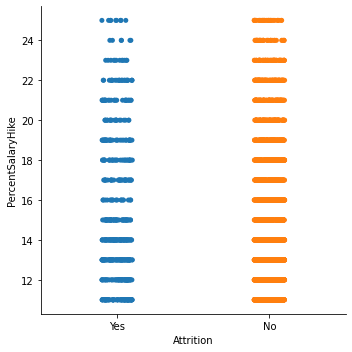

In [140]:
sns.catplot(x="Attrition", y="PercentSalaryHike", data=gendeep)
gendeep.groupby(['Attrition']).agg(mean_Home=('PercentSalaryHike',np.mean))

In [141]:
#they are almost equal in percent salary hike as we can infer it from mean,so this feature is not so dependent on the attrition variable.
#next lets see years at company

Attrition        No  Yes
YearsAtCompany          
0                60   40
1               241  151
2               227   66
3               242   35
4               221   40
5               398   49
6               142   19
7               155   26
8               140   24
9               177   20
10              205   38
11               71    3
12               33    0
13               45    3
14               38    6
15               38    3
16               27    3
17               23    3
18               26    3
19               22    0
20               58    3
21               17    3
22               27    3
23                3    0
24                9    3
25                9    0
26                9    0
27                3    0


Text(0, 0.5, 'percentage')

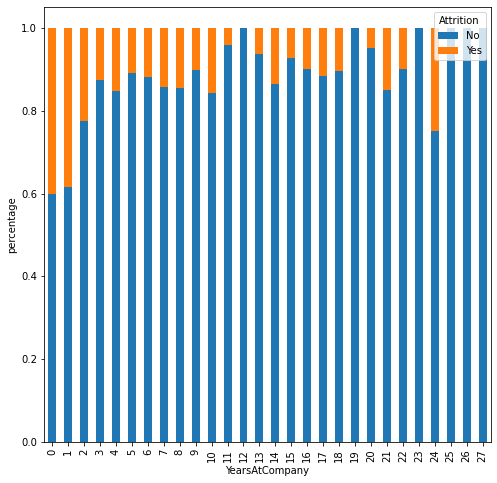

In [142]:
print(pd.crosstab(gendeep['YearsAtCompany'],gendeep['Attrition']))

job=pd.crosstab(gendeep['YearsAtCompany'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('YearsAtCompany')
plt.ylabel('percentage')

In [143]:
#we can infer that years at company for 0-3 years ,people tends to leave job.
#lets see years since last promotion.

Attrition                  No  Yes
YearsSinceLastPromotion           
0                        1042  251
1                         685  123
2                         291   60
3                         105   15
4                         109   12
5                          95    3
6                          55    6
7                         117   44
8                          33    0
9                          18   12
10                          8    3
11                         42    6
12                         18    0
13                         18    3
14                         15    0
15                         15    6


Text(0, 0.5, 'percentage')

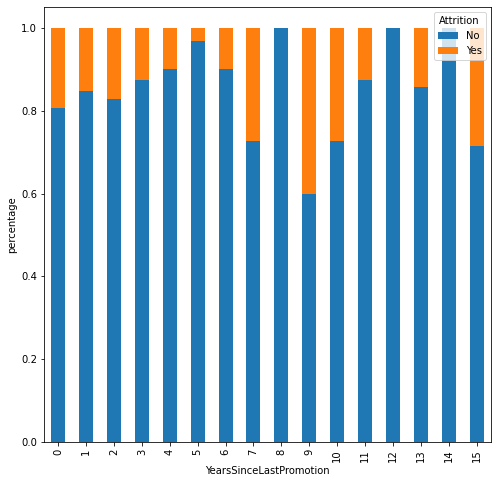

In [144]:
print(pd.crosstab(gendeep['YearsSinceLastPromotion'],gendeep['Attrition']))

job=pd.crosstab(gendeep['YearsSinceLastPromotion'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('YearsSinceLastPromotion')
plt.ylabel('percentage')

In [145]:
#we infer that people having greater than or equal to 7 of years since last promotion, tends to leave the job.
#lets see years with current manager.

Attrition              No  Yes
YearsWithCurrManager          
0                     386  213
1                     140   20
2                     649  112
3                     302   40
4                     178   23
5                      69   12
6                      50    8
7                     360   75
8                     227   20
9                     116    9
10                     48    3
11                     56    3
12                     42    0
13                     21    0
14                      6    6
15                      8    0
16                      2    0
17                      6    0


Text(0, 0.5, 'percentage')

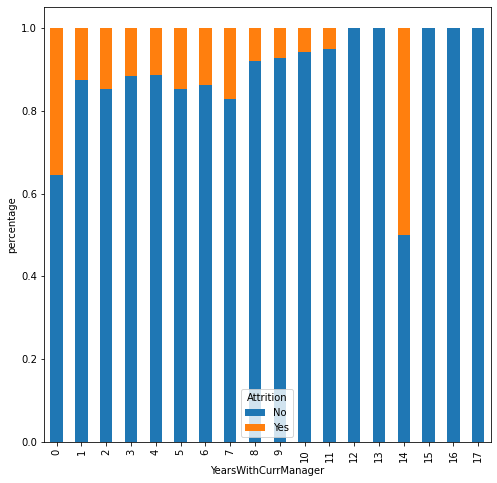

In [146]:
print(pd.crosstab(gendeep['YearsWithCurrManager'],gendeep['Attrition']))

job=pd.crosstab(gendeep['YearsWithCurrManager'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('YearsWithCurrManager')
plt.ylabel('percentage')

In [147]:
#we can refer that at 0 years maxmimum are leaving it may be because they don't like their current manager or having some issues,that's
#why it is in 0 years.At 14 years may be their is outlier because it is very uneven distributed.

Attrition           No  Yes
EducationField             
Human Resources     42   26
Life Sciences     1041  246
Marketing          312   59
Medical            844  156
Other              156   24
Technical Degree   271   33


Text(0, 0.5, 'percentage')

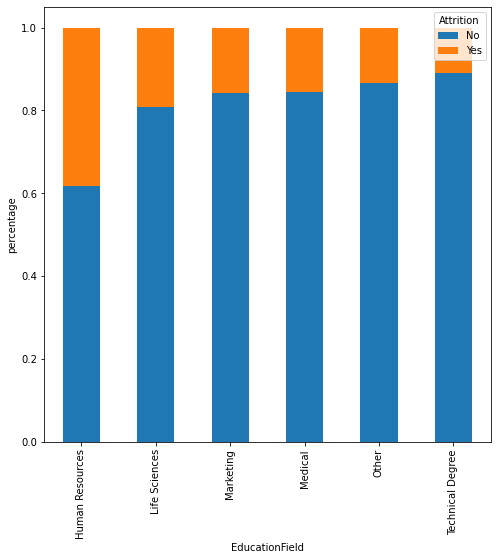

In [148]:
print(pd.crosstab(gendeep['EducationField'],gendeep['Attrition']))

job=pd.crosstab(gendeep['EducationField'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('EducationField')
plt.ylabel('percentage')

In [149]:
#we can infer that people in human resources tends to leave the job more frequent.
#next lets see deaprtment

Attrition                 No  Yes
Department                       
Human Resources          108   48
Research & Development  1698  343
Sales                    860  153


Text(0, 0.5, 'percentage')

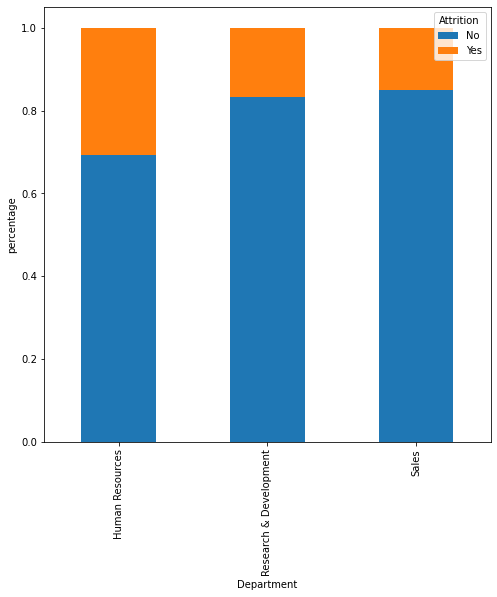

In [150]:
print(pd.crosstab(gendeep['Department'],gendeep['Attrition']))

job=pd.crosstab(gendeep['Department'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Department')
plt.ylabel('percentage')

In [151]:
#we can infer that human resources department tends to leave the job more frequently.
#next lets see business travel

Attrition            No  Yes
BusinessTravel              
Non-Travel          281   27
Travel_Frequently   472  166
Travel_Rarely      1913  351


Text(0, 0.5, 'percentage')

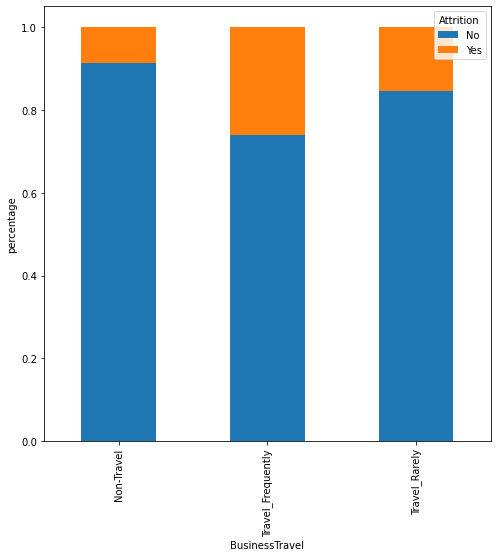

In [152]:
print(pd.crosstab(gendeep['BusinessTravel'],gendeep['Attrition']))

job=pd.crosstab(gendeep['BusinessTravel'],gendeep['Attrition'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('BusinessTravel')
plt.ylabel('percentage')

In [153]:
#feature engeneering

In [69]:
# to define new features (divide by something+1 to prevent division by zero)
geendeep_2['Job_Coy'] = geendeep_2['JobLevel'] / (geendeep_2['YearsAtCompany'] + 1)
geendeep_2['Edu_Age_TotalWorking'] = geendeep_2['Education'] / (geendeep_2['Age'] + geendeep_2['TotalWorkingYears'])
geendeep_2['CurrMgr_Coy'] = geendeep_2['YearsWithCurrManager'] / (geendeep_2['YearsAtCompany'] + 1)
geendeep_2['CurrRole_CurrMgr'] = geendeep_2['YearsAtCompany'] / (geendeep_2['YearsWithCurrManager'] + 1)
# df

In [71]:
# to drop useless features
geendeep_2= geendeep_2.drop(columns=['Over18', 'EmployeeCount', 'EmployeeID', 'StandardHours'])

# label encoding to clean up categorical data
categorical_data = {
    'Attrition': {'No':0, 'Yes':1}, 
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':0}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    #'Over18': {'Y':1}, 
    'OverTime': {'No':0, 'Yes':1}
       }
geendeep_2 = geendeep_2.replace(categorical_data)
geendeep_2

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [72]:
pd.set_option('max_columns', None)
geendeep_2.head()

,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,OverTime,Job_Coy,Edu_Age_TotalWorking,CurrMgr_Coy,CurrRole_CurrMgr
1,2,4,3.0,2.0,4.0,31,1,1,1,10,1,1,0,1,6,1,41890.0,0.0,23,1,6.0,3.0,5,1,4,1,0.166667,0.027027,0.666667,1.0
4,3,3,4.0,1.0,3.0,32,0,2,1,10,1,3,0,1,7,1,23420.0,4.0,12,2,9.0,2.0,6,0,4,1,0.142857,0.024390,0.571429,1.2
6,3,4,1.0,3.0,1.0,28,1,2,1,11,2,3,0,2,7,1,58130.0,2.0,20,1,5.0,2.0,0,0,0,1,2.000000,0.060606,0.000000,0.0
7,3,4,1.0,2.0,3.0,29,0,2,1,18,3,1,0,2,7,2,31430.0,2.0,22,3,10.0,2.0,0,0,0,0,2.000000,0.076923,0.000000,0.0
8,3,4,2.0,4.0,3.0,31,0,2,1,1,3,1,0,3,2,2,20440.0,0.0,21,0,10.0,2.0,9,7,8,1,0.300000,0.073171,0.800000,1.0


In [73]:
geendeep_22=geendeep_2.copy(deep=True)

Top 10 Features: ['YearsAtCompany', 'Age', 'CurrMgr_Coy', 'OverTime', 'CurrRole_CurrMgr', 'MaritalStatus', 'NumCompaniesWorked', 'MonthlyIncome', 'EnvironmentSatisfaction', 'DistanceFromHome']


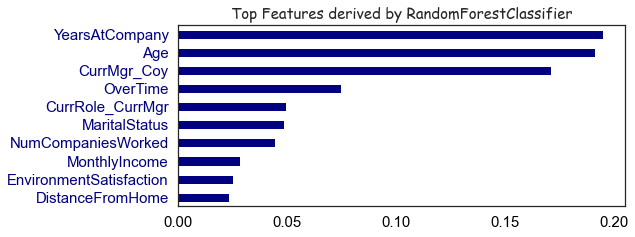

In [108]:
# define feature X and target y dataset (X and y are commonly used in sklearn)
X, y = geendeep_2.drop('Attrition', axis=1), geendeep_2['Attrition']

# use RandomForestClassifier to look for important key features
n = 10  # specify n (top n features)
rfc = RandomForestClassifier(random_state=SEED, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X, y)
pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(n).plot(kind='barh', 
    figsize=[8, n/3], color='navy').invert_yaxis()    # most important feature is on top, ie, descending order
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
top10_features = pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))

(11.5, -0.5)

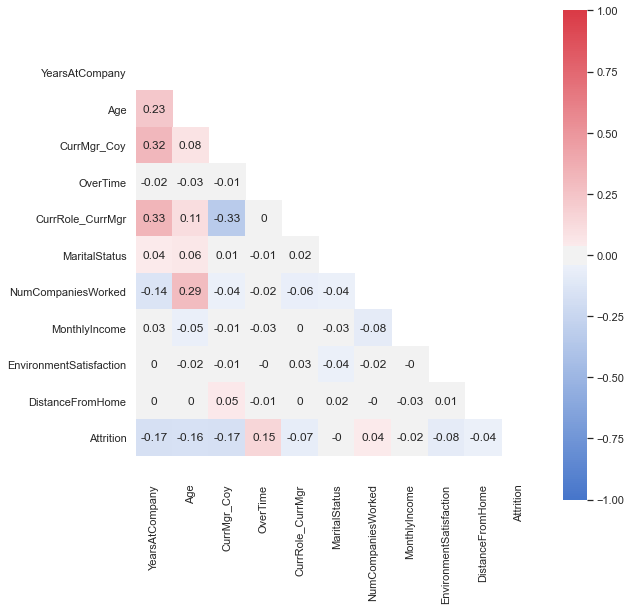

In [109]:
# check for correlation between top 10 features
X = geendeep_2.loc[:, top10_features.index]
y = geendeep_2['Attrition']
df_top10 = X.join(y)
# correlation matrix heatmap visualization
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df_top10.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(9,9))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(df_top10.corr().round(2), mask=mask, annot=True, annot_kws={"size": 12}, square=True, 
            cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot=True display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [76]:
#0.71 with education
geendeep_2 = geendeep_2.drop(columns=['Edu_Age_TotalWorking'])

In [77]:
#0.5 0.56 correlated with job level and years at company
geendeep_2 = geendeep_2.drop(columns=['Job_Coy'])

In [78]:
#0.62 with age job_coy cuurentmanagercoy
geendeep_2 = geendeep_2.drop(columns=['TotalWorkingYears'])

In [79]:
#dropping yearswith currmanager because it is highly correlated with years at company (.8).(feature importance)
geendeep_2 = geendeep_2.drop(columns=['YearsWithCurrManager'])

In [80]:
#highle correlation between percent salary hike and performance rating i.e 0.77,so dropped percent salary (feature importance)
geendeep_2 = geendeep_2.drop(columns=['PercentSalaryHike'])

In [81]:
#high correlation between years at company and years since last promotion i.e .62,so dropping years since last promotion(feature importance)
geendeep_2 = geendeep_2.drop(columns=['YearsSinceLastPromotion'])

In [ ]:
#again run the previous two for feature selection and correlation of top 10 features  cell.

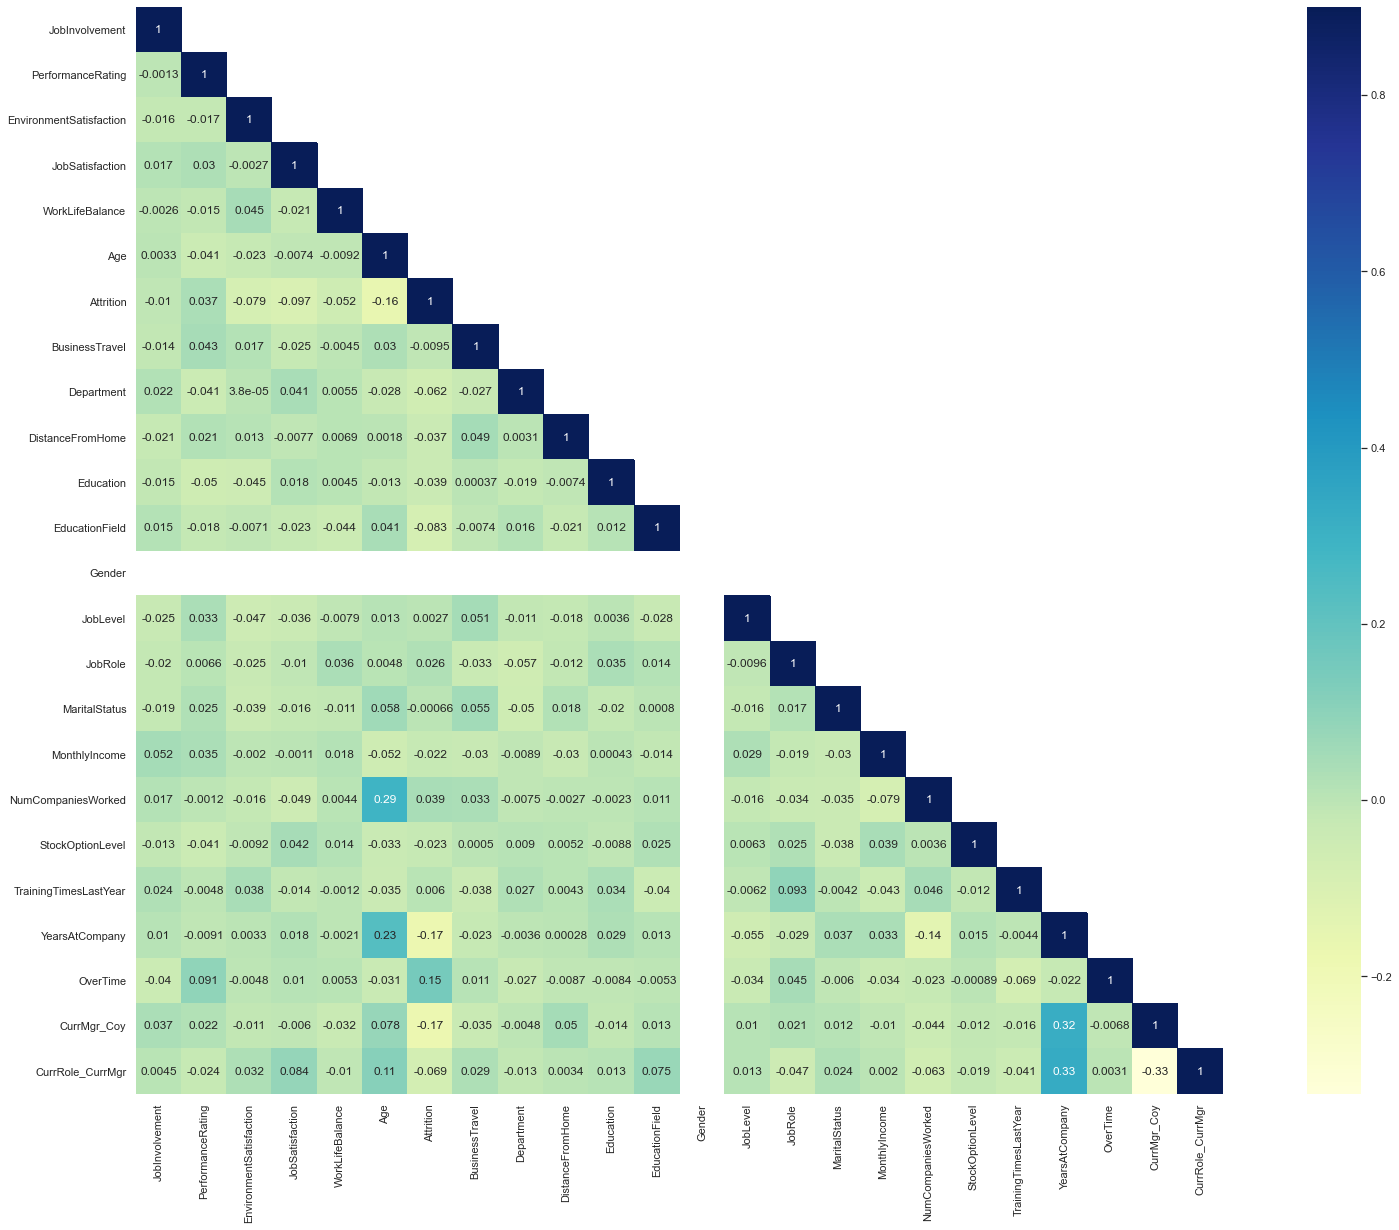

In [82]:
corr = geendeep_2.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(30,20)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [ ]:
# to visualise pair plot of top 10 features
sns.pairplot(df_top10, hue='Attrition', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

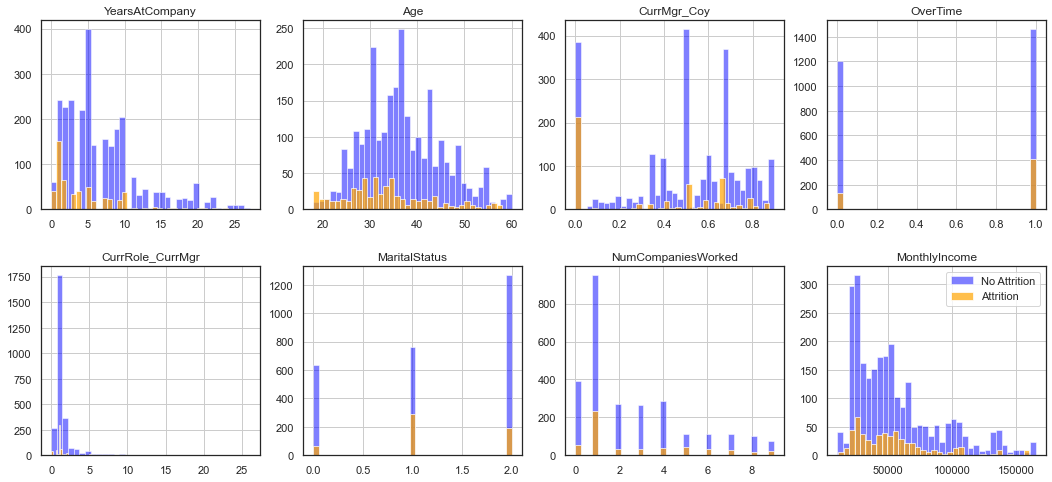

In [110]:
# analyse feature-outcome distribution in visualisation
features = list(top10_features.index)[0:8]   # visualise only the top 8 features

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    geendeep_2[geendeep_2.Attrition==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
    geendeep_2[geendeep_2.Attrition==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Attrition', 'Attrition'])
fig.subplots_adjust(hspace=0.3)

In [ ]:
#Next, we will start to build our predictive model to predict a person will say yes in attrition or not.

In [176]:
#MODEL BUILDING

In [85]:
# define feature X and target y dataset (X and y are commonly used in sklearn)
X, y = geendeep_2.drop('Attrition', axis=1), geendeep_2['Attrition']
print('X', X.shape, 'y', y.shape)

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)   # use this

X (3210, 23) y (3210,)
X_train (2568, 23)
y_train (2568,)
X_test (642, 23)
y_test (642,)


In [87]:
# # To explore: Scaling Numerical columns
from sklearn.preprocessing import StandardScaler #don't know bell curved or not
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
## BASELINE model performance evaluation
# to define which metric and model to use
met = {'accuracy':True, 'precision':True, 'recall':True, 'f1score':True, 'rocauc':True, 'logloss':True}
mod = {'gnb':True, 'bnb':True, 'mnb':True, 'logr':True, 'knn':True, 'dt':True, 'rf':True, 'xgb':False, 'svc':True, 'lsvc':True}

# to give model baseline performance report in dataframe 
def metric(model, X_train, X_test, y_train, y_test, name):
    accuracy1 = accuracy2 = precision = recall = f1score = rocauc = logloss = 0.0
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if met['accuracy']:
        accuracy1 = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
        accuracy2 = accuracy_score(y_test, y_pred)
    if met['precision']: precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    if met['recall']:    recall    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    if met['f1score']:   f1score   = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    if met['rocauc']:    rocauc    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    if met['logloss']:   logloss   = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [0.0]       })   # timetaken: to be used for comparison later

# to initialise an empty dataframe
rpt = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

# to initialise all baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
#mnb = MultinomialNB()
logr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
#xgb = XGBClassifier()
svc = SVC()
lsvc = LinearSVC()

if mod['gnb']:  rpt = pd.concat([rpt, metric(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')])   # default axis=0
if mod['bnb']:  rpt = pd.concat([rpt, metric(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')])
#if mod['mnb']:  rpt = pd.concat([rpt, metric(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')])
if mod['logr']: rpt = pd.concat([rpt, metric(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')])
if mod['knn']:  rpt = pd.concat([rpt, metric(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')])
if mod['dt']:   rpt = pd.concat([rpt, metric(dt, X_train, X_test, y_train, y_test, 'DecisionTree')])
if mod['rf']:   rpt = pd.concat([rpt, metric(rf, X_train, X_test, y_train, y_test, 'RandomForest')])
#if mod['xgb']:  rpt = pd.concat([rpt, metric(xgb, X_train, X_test, y_train, y_test, 'XGBoost')])
if mod['svc']:  rpt = pd.concat([rpt, metric(svc, X_train, X_test, y_train, y_test, 'SVC')])
if mod['lsvc']: rpt = pd.concat([rpt, metric(lsvc, X_train, X_test, y_train, y_test, 'LinearSVC')])
rpt = rpt.reset_index(drop=True)
display(rpt)


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.833339,0.842679,0.510552,0.351724,0.414874,0.740528,5.433710,0.0
1,BernoulliNB,0.839172,0.844237,0.667501,0.114943,0.194381,0.732347,5.379883,0.0
2,LogisticRegression,0.835280,0.847352,0.555974,0.119540,0.193959,0.739870,5.272284,0.0
3,KNearestNeighbour,0.838789,0.845794,0.535173,0.370115,0.436546,0.867144,5.326118,0.0
4,DecisionTree,0.962615,0.993769,0.869308,0.882759,0.889948,0.935194,0.215197,0.0
5,RandomForest,0.973517,0.996885,0.984903,0.857471,0.915908,0.986123,0.107597,0.0
6,SVC,0.894080,0.923676,0.956277,0.395402,0.556327,0.924529,2.636140,0.0
7,LinearSVC,0.839561,0.844237,0.826984,0.071264,0.127982,0.738392,5.379874,0.0


In [ ]:
#by feature engineering we see random forest is at its highest F1-SCORE:91% RECALL:85%
#lets see if we can improve by balancing the data by smtoc

In [90]:
# to check if over-sampling can improve the model performance.
bestmodel = rf

# baseline model performance (before over-sampling)
print('(Original) Baseline X_train.shape:', X_train.shape)
print(pd.value_counts(pd.Series(y_train)))
bestmodel.fit(X_train, y_train)
y_pred = bestmodel.predict(X_test)
print('Model accuracy is', accuracy_score(y_test, y_pred))
print('Model accuracy is', bestmodel.score(X_test, y_test))   # same result (.score uses accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# re-run model with resampled data using SMOTE over-sampling
# handling imbalance data: create fake sample data to add to the minority class to balance it out.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=SEED)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.ravel())
print('\nAfter SMOTE over-sampling X_train_sm.shape:', X_train_sm.shape)
print(pd.value_counts(pd.Series(y_train_sm)))
bestmodel_sm = bestmodel.fit(X_train_sm, y_train_sm)
y_pred = bestmodel_sm.predict(X_test)
print('Model accuracy is', accuracy_score(y_test, y_pred))
print('Model accuracy is', bestmodel_sm.score(X_test, y_test)) 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

(Original) Baseline X_train.shape: (2568, 23)
0    2133
1     435
Name: Attrition, dtype: int64
Model accuracy is 0.9953271028037384
Model accuracy is 0.9953271028037384
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       0.99      0.98      0.99       109

    accuracy                           1.00       642
   macro avg       0.99      0.99      0.99       642
weighted avg       1.00      1.00      1.00       642

[[532   1]
 [  2 107]]

After SMOTE over-sampling X_train_sm.shape: (4266, 23)
1    2133
0    2133
dtype: int64
Model accuracy is 0.9968847352024922
Model accuracy is 0.9968847352024922
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       533
           1       0.98      1.00      0.99       109

    accuracy                           1.00       642
   macro avg       0.99      1.00      0.99       642
weighted avg       1.00      1.00      1.00  

In [91]:
X_train = X_train_sm
y_train = y_train_sm

In [92]:
## BASELINE model performance evaluation
# to define which metric and model to use
met = {'accuracy':True, 'precision':True, 'recall':True, 'f1score':True, 'rocauc':True, 'logloss':True}
mod = {'gnb':True, 'bnb':True, 'mnb':True, 'logr':True, 'knn':True, 'dt':True, 'rf':True, 'xgb':False, 'svc':True, 'lsvc':True}

# to give model baseline performance report in dataframe 
def metric(model, X_train, X_test, y_train, y_test, name):
    accuracy1 = accuracy2 = precision = recall = f1score = rocauc = logloss = 0.0
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if met['accuracy']:
        accuracy1 = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
        accuracy2 = accuracy_score(y_test, y_pred)
    if met['precision']: precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    if met['recall']:    recall    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    if met['f1score']:   f1score   = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    if met['rocauc']:    rocauc    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    if met['logloss']:   logloss   = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [0.0]       })   # timetaken: to be used for comparison later

# to initialise an empty dataframe
rpt = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

# to initialise all baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
#mnb = MultinomialNB()
logr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
#xgb = XGBClassifier()
svc = SVC()
lsvc = LinearSVC()

if mod['gnb']:  rpt = pd.concat([rpt, metric(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')])   # default axis=0
if mod['bnb']:  rpt = pd.concat([rpt, metric(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')])
#if mod['mnb']:  rpt = pd.concat([rpt, metric(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')])
if mod['logr']: rpt = pd.concat([rpt, metric(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')])
if mod['knn']:  rpt = pd.concat([rpt, metric(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')])
if mod['dt']:   rpt = pd.concat([rpt, metric(dt, X_train, X_test, y_train, y_test, 'DecisionTree')])
if mod['rf']:   rpt = pd.concat([rpt, metric(rf, X_train, X_test, y_train, y_test, 'RandomForest')])
#if mod['xgb']:  rpt = pd.concat([rpt, metric(xgb, X_train, X_test, y_train, y_test, 'XGBoost')])
if mod['svc']:  rpt = pd.concat([rpt, metric(svc, X_train, X_test, y_train, y_test, 'SVC')])
if mod['lsvc']: rpt = pd.concat([rpt, metric(lsvc, X_train, X_test, y_train, y_test, 'LinearSVC')])
rpt = rpt.reset_index(drop=True)
display(rpt)


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.707695,0.677570,0.689078,0.760442,0.722557,0.785684,11.136551,0.0
1,BernoulliNB,0.710740,0.680685,0.703246,0.731378,0.716694,0.763008,11.028947,0.0
2,LogisticRegression,0.706753,0.699377,0.701457,0.721537,0.711010,0.771792,10.383347,0.0
3,KNearestNeighbour,0.880451,0.830218,0.808571,0.997186,0.892992,0.987054,5.864193,0.0
4,DecisionTree,0.969759,0.987539,0.967842,0.969522,0.969602,0.970930,0.430396,0.0
5,RandomForest,0.995077,0.996885,0.995308,0.992968,0.993194,0.999799,0.107600,0.0
6,SVC,0.964602,0.970405,0.951371,0.979372,0.965119,0.995077,1.022194,0.0
7,LinearSVC,0.707456,0.697819,0.700508,0.725757,0.712690,0.772023,10.437148,0.0


In [ ]:
#After applying SMOTE :Random Forest wins:F1SCORE:99.3% and RECALL:99.2%

In [ ]:
#apply hyperparameter tuning for the best model i.e random forest using random search.

In [94]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [97]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [98]:
# making prediction on the validation set
predict = rf_random.predict(X_test)
# calculating the accuracy score
accuracy_score(y_test, predict)
precision = np.mean(cross_val_score(rf_random, X_train, y_train, cv=kf, scoring='precision'))
recall    = np.mean(cross_val_score(rf_random, X_train, y_train, cv=kf, scoring='recall'))
f1score   = np.mean(cross_val_score(rf_random, X_train, y_train, cv=kf, scoring='f1'))
rocauc    = np.mean(cross_val_score(rf_random, X_train, y_train, cv=kf, scoring='roc_auc'))
logloss   = log_loss(y_test, predict)
print("precision=",precision,"recall=",recall,"fiscore=",f1score,"rocauc=",rocauc,"logloss=",logloss)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.2min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.3min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.4min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.6min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.5min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.1min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.2min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


precision= 0.9957789734941714 recall= 0.9915624896922518 fiscore= 0.9938798548566391 rocauc= 0.9998680994478407 logloss= 0.10759992520978565


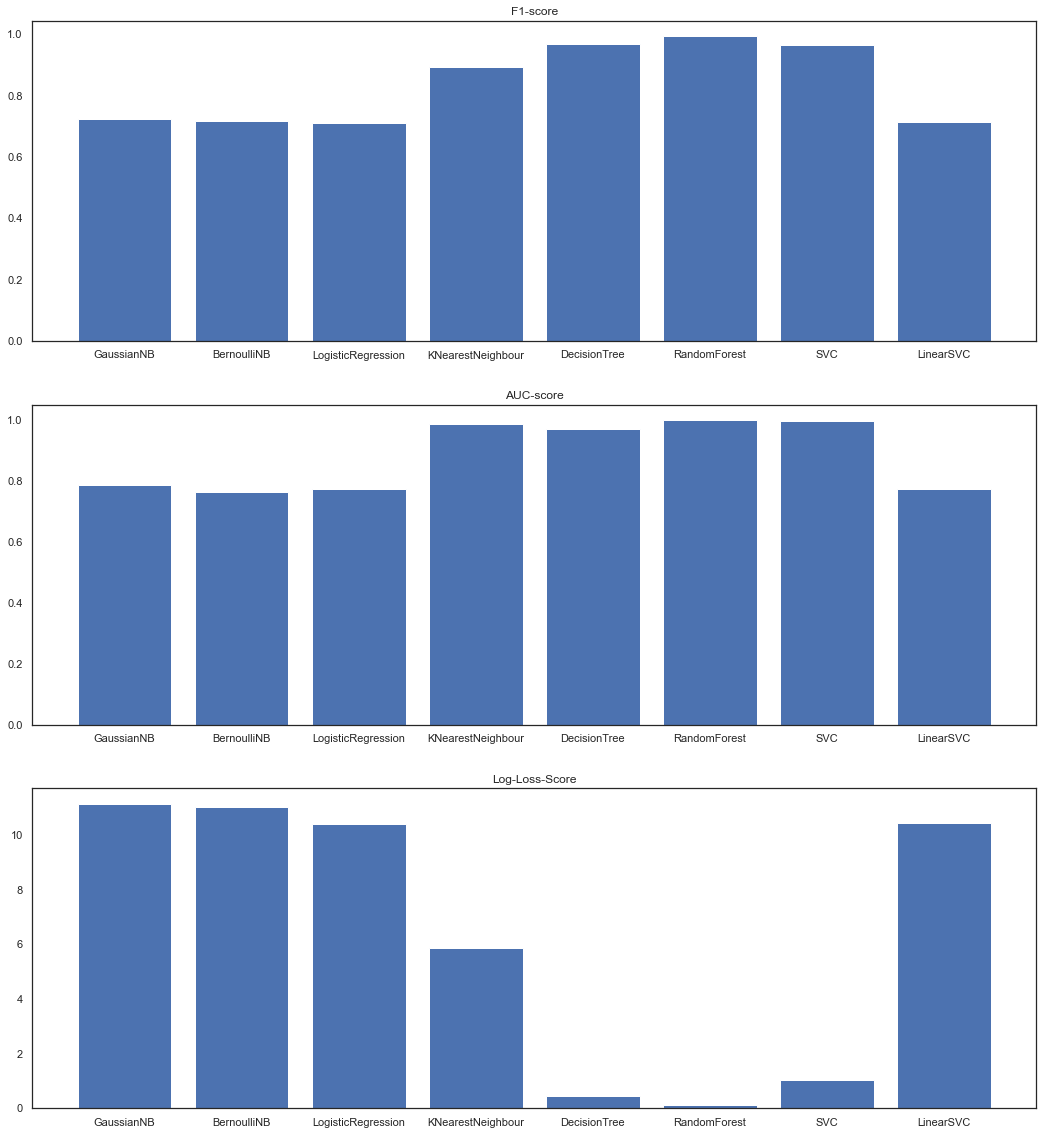

In [107]:
## plot the performance metric scores
fig, ax = plt.subplots(3, 1, figsize=(18, 20))

ax[0].bar(rpt.model, rpt.f1score)
ax[0].set_title('F1-score')

ax[1].bar(rpt.model, rpt.rocauc)
ax[1].set_title('AUC-score')

ax[2].bar(rpt.model, rpt.logloss)
ax[2].set_title('Log-Loss-Score')

#ax[3].bar(rpt.model, rpt.timetaken)
#ax[3].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

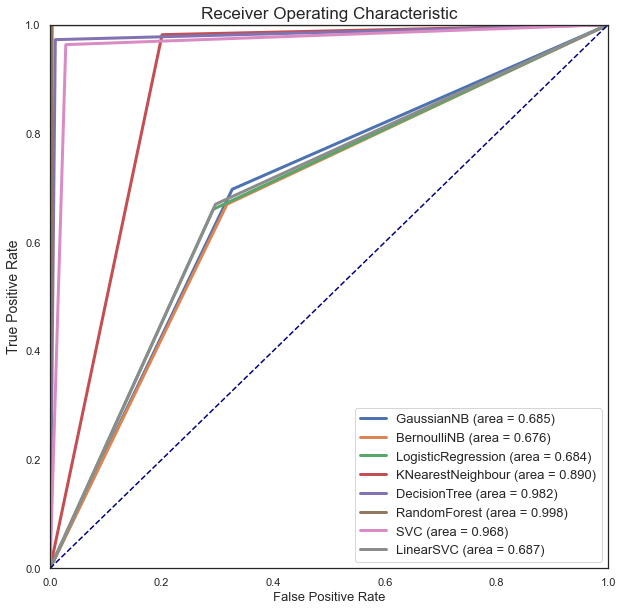

In [105]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# model_name = [gnb, bnb, mnb, logr, knn, dt, rf, xgb, svc, lsvc]
model_name = [gnb, bnb, logr, knn, dt, rf, svc, lsvc]

for i in range(len(model_name)-1):
    y_pred = model_name[i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, lw=3, label=rpt.model[i] + ' (area = %0.3f)' % auc(fpr, tpr))

y_pred = lsvc.predict(X_test)   # linearsvc has no attribute 'predict_proba'
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, lw=3, label='LinearSVC (area = %0.3f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [106]:
# see how model confusion matrix varies with threshold
bestmodel = rf

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no attrition', 'attrition'],
           yticklabels=['no attrition', 'attrition']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
# Let's see how the confusion matrix changes with changes to the threshold 
from ipywidgets import interactive, FloatSlider
# bestmodel = LogisticRegression(C = optimal_c)
# bestmodel.fit(X_train, y_train)
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [ ]:
#The winning model
#In general for the winning model, both Recall and F1-score metrics have been used.
#Iteration 1, added new features (feature engineering): RandomForest  F1-SCORE:91% and RECALL:85%
#Iteration 2,with SMOTE over-sampling: RandomForest : with highest score F1SCORE:99.3% and RECALL:99.2%
#Iteration 3, Hyperparameter with tuning(Random search): Random forest, not much improved the score F1-score 99.3% and Recall 99.1%


In [ ]:
#Main features affected the Attrition are selected (by feature selection) and to curb attrition one should focus on the listed below features:
#This are the top 10 features(in decreasing order) selected by feature selection:
#1.YearsAtCompany-we can infer that total working years of 1 year tends to switch job mostly.
#2.Age-so the mean age of people leaving is 33 and mostly leaving are the younger people 20-40 specially age of 33.
#3.CurrMgr_Coy-negative correlated,tends to leave at initial years of working years.
#4.OverTime-It is a key factor may be because of monetary issue.
#5.CurrRole_CurrMgr-negative correlated,leaves at starting years only if manager is not good for the employee.
#6.MaritalStatus-we can infer that singles tends to leave the job more often i.e 27.5% approx.
#7.NumCompaniesWorked- people tends to leave job who have more or equal to 5 number of companies worked.
#8.MonthlyIncome- monetary factor for the employee.
#9.EnvironmentSatisfaction- level lower than 1 tends to leave the job so one should focus on environment of the employee.
#10.DistanceFromHome-Travel can be one factor.